In [187]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [269]:
df = pd.read_csv(r'C:\Users\parvathi143\Desktop\Dataset_collection\crop_recommendation.csv')

In [271]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,100,57,38,20.879744,82.002744,6.502985,202.935536,rice
1,70,57,44,21.770462,80.319644,7.038096,226.655537,rice
2,99,38,41,23.004459,82.320763,7.840207,263.964248,rice
3,98,55,37,26.491096,80.158363,6.980401,242.864034,rice
4,86,53,35,20.130175,81.604873,7.628473,262.717340,rice


In [273]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,82,29,34,26.774637,66.413269,6.780064,177.774507,coffee
2196,98,39,35,27.417112,56.636362,6.086922,127.924610,coffee
2197,116,36,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,86,30,28,26.272418,52.127394,6.758793,127.175293,coffee
2199,82,19,34,23.603016,60.396475,6.779833,140.937041,coffee


In [195]:
df.shape

(2200, 8)

In [196]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [199]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [201]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [203]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

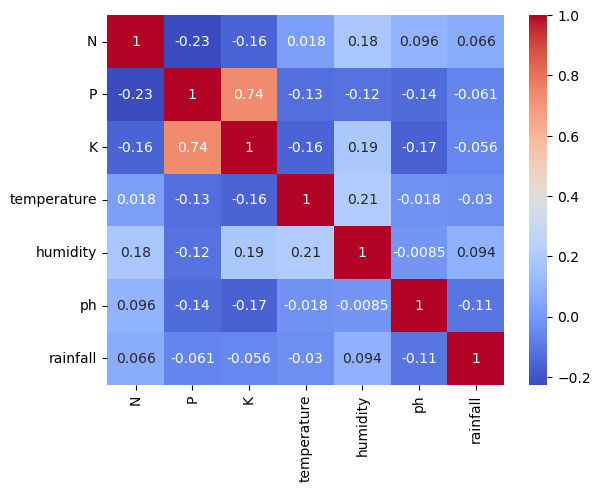

In [205]:
numeric_df = df.select_dtypes(include=[float, int])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

### Seperating features and target label

In [208]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [210]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [212]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [215]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.18181818181817
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.11      0.19        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.88      1.00      0.93        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [217]:
from sklearn.model_selection import cross_val_score

In [219]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [220]:
score

array([0.95454545, 0.93409091, 0.95      , 0.89545455, 0.95681818])

### Saving trained Decision Tree model

In [275]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [278]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99545455, 0.98636364, 0.99090909])

In [284]:
import pickle
import os

# Define the filename and directory
NB_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\NBClassifier.pkl'
model_directory = os.path.dirname(NB_pkl_filename)

# Ensure the directory exists
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Save the trained Naive Bayes model using Pickle
try:
    with open(NB_pkl_filename, 'wb') as file:
        pickle.dump(NaiveBayes, file)
    print(f"Model successfully saved to {NB_pkl_filename}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")


Model successfully saved to C:\Users\parvathi143\Desktop\webapp\webapp\models\NBClassifier.pkl


### Saving trained Guassian Naive Bayes model

In [287]:
#import pickle
# Dump the trained Naive Bayes classifier with Pickle
#NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
#NB_Model_pkl = open(NB_pkl_filename, 'wb')
#pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
#NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [289]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
 

In [291]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.98409091, 0.98863636, 0.98636364, 0.97954545])

### Saving trained SVM model

In [294]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\NBClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.79      0.94      0.86        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      0.85      0.92        20
      grapes       1.00      1.00      1.00        18
        jute       0.80      0.86      0.83        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       0.88      1.00      0.93        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.79      0.86        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [299]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94090909, 0.94318182, 0.95227273, 0.96363636, 0.95681818])

### Saving trained Logistic Regression model

In [301]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      0.95      0.97        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [324]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99318182, 0.98863636, 0.99545455])

### Saving trained Random Forest model

In [328]:

import pickle
# Dump the trained Random forest classifier with Pickle
RF_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\RandomForest.pkl'

# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()


In [332]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [335]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import xgboost as xgb

# Encode the labels
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Initialize and train the XGBoost Classifier
XB = xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False)  # Suppress label encoder warning
XB.fit(Xtrain, Ytrain_encoded)

# Predict on the test set
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')

# Print accuracy
print(f"XGBoost's Accuracy: {x * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(Ytest_encoded, predicted_values, target_names=label_encoder.classes_))


XGBoost's Accuracy: 98.64%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.95      0.95      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.93      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1

# XGBoost

In [338]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import xgboost as xgb

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)  # Ensure to transform Ytest too

# Initialize and fit the XGBoost Classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Make predictions
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest_encoded, predicted_values)  # Use encoded Ytest for accuracy
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(metrics.classification_report(Ytest_encoded, predicted_values, target_names=label_encoder.classes_))


XGBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      1.00      0.98        21
      coffee       0.95      0.95      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.93      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [340]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming features and target are your feature matrix and labels respectively
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels to numeric
target_encoded = label_encoder.fit_transform(target)

# Initialize the XGBoost Classifier
XB = xgb.XGBClassifier()

# Perform cross-validation with the encoded target variable
score = cross_val_score(XB, features, target_encoded, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())


Cross-validation scores: [0.99090909 0.99090909 0.99772727 0.99090909 0.98863636]
Mean cross-validation score: 0.9918181818181818


### Saving trained XGBoost model

In [342]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = r'C:\Users\parvathi143\Desktop\webapp\webapp\models\XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

In [345]:
print(acc)
print(model)
model=model[:-3]
print(model)

[0.9318181818181818, 0.990909090909091, 0.975, 0.9545454545454546, 0.9863636363636363, 0.990909090909091, 0.975, 0.9545454545454546, 0.9863636363636363, 0.9863636363636363, 0.9863636363636363, 0.9863636363636363]
['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'RF', 'XGBoost', 'XGBoost']
['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF']


In [347]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9318181818181818
Naive Bayes --> 0.990909090909091
SVM --> 0.975
Logistic Regression --> 0.9545454545454546
RF --> 0.9863636363636363


## Making a prediction

In [350]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [352]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
